# FX cross pricing

In [1]:
import numpy as np
from frh_fx import mpl, nig, frh, uts, sim, blk
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
mpl.config(scale=1.5,print_keys=False)

In [3]:
T = np.array([1/12,3/12,6/12,1])

In [4]:
σ1,ρ1 = 0.1, 0.2
σ2,ρ2 = 0.1,-0.5
γ = 1
ρ = 0.5

In [5]:
α1,β1,δ1,μ1 = frh.nig_params(σ1,ρ1,γ)
α2,β2,δ2,μ2 = frh.nig_params(σ2,ρ2,γ)

In [6]:
θ1 = α1,β1,δ1
θ2 = α2,β2,δ2
α3,β3,δ3,μ3 = nig.cross_params(θ1,θ2,ρ)
θ3 = α3,β3,δ3

In [7]:
k = uts.get_logstrikes(T)

In [8]:
P1 = nig.price(k,T,θ1)
P2 = nig.price(k,T,θ2)
P3 = nig.price(k,T,θ3)

In [9]:
BS1 = blk.surface(k,T,P1)
BS2 = blk.surface(k,T,P2)
BS3 = blk.surface(k,T,P3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots
Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots
Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots
Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


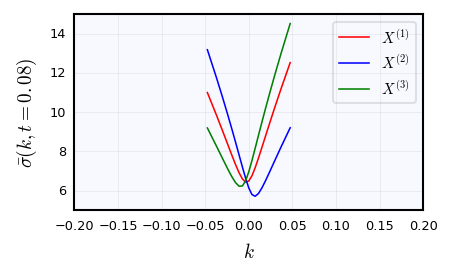

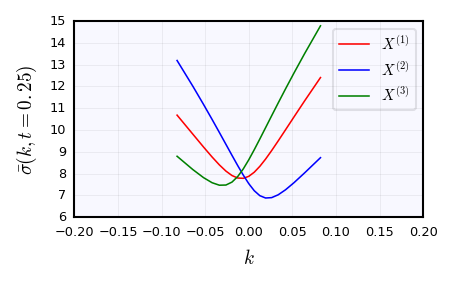

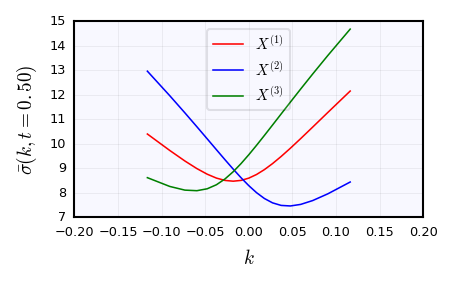

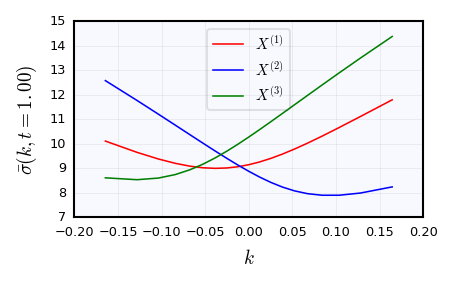

In [10]:
for i in range(len(T)):
    plot,axes = plt.subplots()
    axes.plot(k[i,:],100*BS1[i,:],'r')
    axes.plot(k[i,:],100*BS2[i,:],'b')
    axes.plot(k[i,:],100*BS3[i,:],'g')
    axes.legend([r'$X^{(1)}$',
                 r'$X^{(2)}$',
                 r'$X^{(3)}$'])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
    axes.set_xlim([-0.2,0.2])
    uts.save_plot()

In [11]:
uts.save_data(k,T,BS3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/data/20180522-184539
